# Decorrelating your data and dimension reduction

In [1]:
from IPython.display import HTML
HTML('<iframe src=ch3_slides.pdf width=700 height=450></iframe>')

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
grains = np.genfromtxt('dataset/Grains/seeds-width-vs-length.csv',delimiter=',')

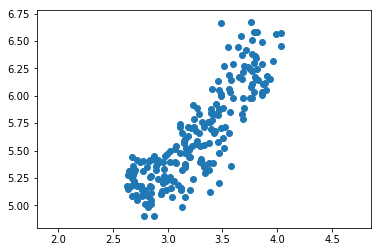

0.8604149377143467


In [14]:
# Perform the necessary imports
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)


# As you would expect, the width and length of the grain samples are highly correlated.

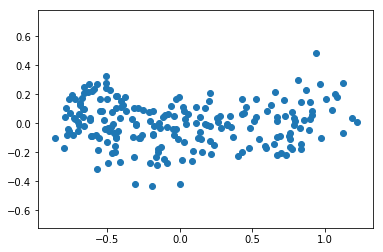

0.0


In [18]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

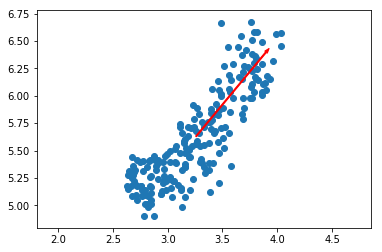

In [21]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [29]:
import numpy as np 
samples = np.genfromtxt('dataset/fish.csv',delimiter=',')
samples = samples[:,1:]

In [30]:
samples

array([[ 242. ,   23.2,   25.4,   30. ,   38.4,   13.4],
       [ 290. ,   24. ,   26.3,   31.2,   40. ,   13.8],
       [ 340. ,   23.9,   26.5,   31.1,   39.8,   15.1],
       [ 363. ,   26.3,   29. ,   33.5,   38. ,   13.3],
       [ 430. ,   26.5,   29. ,   34. ,   36.6,   15.1],
       [ 450. ,   26.8,   29.7,   34.7,   39.2,   14.2],
       [ 500. ,   26.8,   29.7,   34.5,   41.1,   15.3],
       [ 390. ,   27.6,   30. ,   35. ,   36.2,   13.4],
       [ 450. ,   27.6,   30. ,   35.1,   39.9,   13.8],
       [ 500. ,   28.5,   30.7,   36.2,   39.3,   13.7],
       [ 475. ,   28.4,   31. ,   36.2,   39.4,   14.1],
       [ 500. ,   28.7,   31. ,   36.2,   39.7,   13.3],
       [ 500. ,   29.1,   31.5,   36.4,   37.8,   12. ],
       [ 600. ,   29.4,   32. ,   37.2,   40.2,   13.9],
       [ 600. ,   29.4,   32. ,   37.2,   41.5,   15. ],
       [ 700. ,   30.4,   33. ,   38.3,   38.8,   13.8],
       [ 700. ,   30.4,   33. ,   38.5,   38.8,   13.5],
       [ 610. ,   30.9,   33.5,

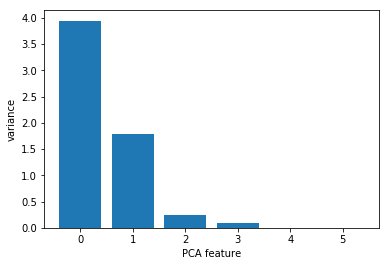

In [33]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features,pca.explained_variance_ )
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


# It looks like PCA features 0 and 1 have significant variance.
# Since PCA features 0 and 1 have significant variance, the intrinsic dimension of this dataset appears to be 2.

In [34]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [35]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 

# Create a TfidfVectorizer: tfidf
tfidf =  TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
[u'cats', u'chase', u'dogs', u'meow', u'say', u'woof']


In [36]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans 
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components = 50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters = 6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)


In [41]:
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('dataset/Wikipedia articles/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [43]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))


                                          article  label
43                                       Leukemia      0
40                                    Tonsillitis      0
41                                    Hepatitis B      0
42                                    Doxycycline      0
44                                           Gout      0
45                                    Hepatitis C      0
46                                     Prednisone      0
48                                     Gabapentin      0
49                                       Lymphoma      0
59                                    Adam Levine      1
51                                     Nate Ruess      1
50                                   Chad Kroeger      1
57                          Red Hot Chili Peppers      1
56                                       Skrillex      1
55                                  Black Sabbath      1
58                                         Sepsis      1
54                             